<a href="https://colab.research.google.com/github/dobrotvorn/DataCon23/blob/main/Hackathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание задания


Задание заключается в построении модели прогнозирования зоны ингибирования для антибиотиков и наночастиц серебра при взаимодействии с бактреиями.

## Описание данных
data.csv

Для всех образцов в датасете использовались наночастицы серебра Ag

---



*   Bacteria: бактериальная клетка-мишень
* NP_Synthesis: тип синтеза наночастиц
* drug: название лекарства
* drug class: класс лекарства
* Drug dose: доза препарата
* NP_concentration: концентрация НЧ
* NP_size: размер НЧ
* shape: форма НЧ
* method: метод определения антимикробной активности
* ZOI_drug, ZOI_NP, ZOI_drug_NP: зона ингибирования препарата, НЧ и их комбинации
* Fold increase in antibacterial activity (%): кратное увеличение
* антибактериальной активности (%)
* дзета-потенциал;
* MDR: множественная лекарственная устойчивость резистентен ли обычный препарат к целевому патогену

---

bacterial_descriptors.csv


* Tax_id: id бактерии в базе данных NCBI
* Bacteria: название бактерии
* ingdom: царство бактерии
* subkingdom: подцарство бактерии
* clade: характеристика бактерии с точки зрения родственных взаимоотношений между таксономическими группами
* phylum: филум бактерии
* class: класс бактерии
* order: порядок бактерии
* family: семейство бактерии
* genus: род бактерии
* species: вид бактерии
* gram: результат реакции окрашивания по Грамму для бактерии
* min_Incub_period, avg_Incub_period, max_Incub_period h: характеристики инкубационного периода бактерии
* growth_temp, C: температура роста бактерии
* biosafety_level: уровень опасности бактерии
* isolated_from: источник


---

drug_descriptors.csv
* drug: название лекарства
* chemID: id лекарства в базе данных CHEMBL
* prefered_name: название лекарства
* smiles: химическая формула лекарства

## Загрузка данных и библиотек

###Импортируем и скачиваем библиотеки

In [160]:
!pip install gdown -- quiet
!pip install pymatgen
!pip install rdkit
!pip install fancyimpute --quiet
!pip install shap
!pip install livelossplot --quiet

from IPython.display import clear_output
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin


import torch

import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import plotly
import scipy.stats as stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN
import pymatgen.core as mg
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import SimilarityMaps
from zipfile import ZipFile

%matplotlib inline
import pandas as pd
from IPython.display import clear_output
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import  MinMaxScaler,PolynomialFeatures,StandardScaler
from sklearn.impute import  KNNImputer, SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, KBinsDiscretizer # говорят, он хорош для выбрасов
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import StratifiedKFold #так как у нас несбалансированные таргеты (много небольших цен и мало больших), возможно, стоит так стратифицировать.
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor, VotingRegressor
from sklearn.linear_model import SGDRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from time import sleep
from matplotlib import pyplot as plt
import numpy as np
from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot



from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import KNNImputer
from IPython.display import display, HTML
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
from re import A
import json
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
clear_output()

In [161]:
# Тут захардкодим статичные переменные
global ordinal_encoder
global text_columns
global path2firstDb
global path2secondDb
global numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
path2data = '/content/data.csv' if 'google.colab' in sys.modules else 'data.csv'
path2bac_descr = '/content/bacterial_descriptors.csv' if 'google.colab' in sys.modules else 'bacterial_descriptors.csv'
path2drug_descr = '/content/drug_descriptors.csv' if 'google.colab' in sys.modules else 'drug_descriptors.csv'

### Скачиваем данные

In [162]:
url1 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/data.csv'
url2 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/bacterial_descriptors.csv'
url3 = 'https://raw.githubusercontent.com/dataconHack/hackathon/main/drug_descriptors.csv'
output1 = 'data.csv'
output2 = 'bacterial_descriptors.csv'
output3 = 'drug_descriptors.csv'
gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
clear_output()

## Обработка данных

In [163]:
fdb = pd.read_csv(path2data)
fdb_bak = pd.read_csv(path2bac_descr)
fdb_drug = pd.read_csv(path2drug_descr)

In [164]:
# Добавляем дескрипторы из RDKit
descript = ['MolLogP', 'NumValenceElectrons', 'NumHeteroatoms', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumRotatableBonds', 'TPSA', 'LabuteASA']
def get_descriptors_values(desc, mol):
    descriptors_values = []
    for descr in descript:
        descriptors_values.append(Descriptors.CalcMolDescriptors(mol)[descr])
    return descriptors_values
filled_descriptors_list = []
for item in fdb_drug['smiles']:
  mol = Chem.MolFromSmiles(f'{item}')
  descriptors_with_value = get_descriptors_values(descript, mol)
  filled_descriptors_list.append(descriptors_with_value)
fdb_drug_desc = pd.DataFrame(filled_descriptors_list, columns=descript)
fdb_drug = fdb_drug.join(fdb_drug_desc, how='outer')

In [165]:
# Сольём три табличка в одну ( null не заполняли - лучше мб заполнить сразу же до мерджа)
db =  fdb.merge(fdb_bak, how='left', left_on='Bacteria', right_on='Bacteria').merge(fdb_drug, how='left', left_on='Drug', right_on='drug').drop(['Unnamed: 0.1', 'Unnamed: 0_x', 'Unnamed: 0_y', 'Drug'], axis=1)

In [166]:
# Заменим остальные пропуски в данных на None, потому что сильных зависимостей не обнаружено (за исключением Surface_Charge, но там пришли к мнению, что нейтральный - это 0)
none_mapper = { '-': np.nan, 'None': np.nan, None: np.nan, 'nan': np.nan, pd.NA : np.nan}
db.replace(none_mapper, inplace=True)

### Преобразуем некоторые данные, заменим типы

In [167]:
#Преобразует ZOI типа "32+", "17+2" в числа
def ZOI_transform(x):
  a = None
  try:
    a = eval(x)
  except:
    if type(x) == float or type(x) == int:
      return a
    a = x.split('+')[0]
  return a

#Убирает странные концентрации НЧ
def NP_conc_transform(x):
  a = None
  try:
    a = float(x)
    return a
  except:
    if '/' not in str(x):
      return x
  return np.nan

#Преобразуем данные ZOI и концентрации НЧ
db['ZOI_drug'] = db['ZOI_drug'].apply(lambda x: ZOI_transform(x) if x else np.nan)
db['ZOI_NP'] = db['ZOI_NP'].apply(lambda x: ZOI_transform(x) if x else np.nan)
db['ZOI_drug_NP'] = db['ZOI_drug_NP'].apply(lambda x: ZOI_transform(x) if x else np.nan)
db['NP_concentration'] = db['NP_concentration'].apply(lambda x: NP_conc_transform(x) if x else np.nan)

#Меняем тип данных на float
db = db.astype({'ZOI_drug': np.float, 'ZOI_NP': np.float, 'ZOI_drug_NP': np.float, 'NP_concentration': np.float})

#Убираем царство грибов
db = db.loc[db['kingdom'] != 'Fungi']
db = db.loc[db['Bacteria'] != 'Candida glochares']

#Правим названия бактерий
db.Bacteria[db['Bacteria'] == 'Actinobacillus pleuropneumoniae '] = 'Actinobacillus pleuropneumoniae'
db.Bacteria[db['Bacteria'] == 'Bacillus spp.        '] = 'Bacillus spp.'
db.Bacteria[db['Bacteria'] == 'Enterobacter cloacae '] = 'Enterobacter cloacae'
db.Bacteria[db['Bacteria'] == 'Salmonella  typhi'] = 'Salmonella typhi'

#Добавляем пропуски class и genus
db.genus[db['Bacteria'] == 'Acinetobacter baumanii'] = 'Acinetobacter'
db.genus[db['Bacteria'] == 'Actinobacillus pleuropneumoniae'] = 'Actinobacillus'
db.genus[db['Bacteria'] == 'Bacillus spp.'] = 'Bacillus'
db.genus[db['Bacteria'] == 'Enterobacter cloacae'] = 'Enterobacter'
db.genus[db['Bacteria'] == 'Salmonella typhi'] = 'Salmonella'
db.genus[db['Bacteria'] == 'Salmonella Paratyphi'] = 'Salmonella'
db.genus[db['Bacteria'] == 'Serratia marcescens'] = 'Serratia'
db.loc[(db['Bacteria'] == 'Acinetobacter baumanii') | (db['Bacteria'] == 'Actinobacillus pleuropneumoniae') | (db['Bacteria'] == 'Enterobacter cloacae') |
       (db['Bacteria'] == 'Salmonella typhi') | (db['Bacteria'] == 'Salmonella Paratyphi') | (db['Bacteria'] == 'Serratia marcescens'), 'class'] = 'Gammaproteobacteria'
db.loc[(db['Bacteria'] == 'Bacillus spp.'), 'class'] = 'Bacilli'

# Заменим выбросы в бактериях на данные из исследований
db.ZOI_NP[(db['Bacteria'] == 'Acinetobacter baumanii') & (db['ZOI_NP'] == 1000)] = 13.6
db.ZOI_NP[(db['Bacteria'] == 'Escherichia coli') & (db['ZOI_NP'] == 1000)] = 11
db.ZOI_NP[(db['Bacteria'] == 'Proteus sp.') & (db['ZOI_NP'] == 1000)] = 17.8
db.ZOI_NP[(db['Bacteria'] == 'Pseudomonas aeruginosa') & (db['ZOI_NP'] == 1000)] = 16
db.ZOI_NP[(db['Bacteria'] == 'Klebsiella sp') & (db['ZOI_NP'] == 1000)] = 17.8

# Установим значение Drug_dose и ZOI_drug 0.0 , где нет лекарства
db.loc[db['drug'].isna(), 'Drug_dose'] = 0.0
db.loc[db['drug'].isna(), 'ZOI_drug'] = 0.0

#уберём NaN
db = db.dropna(subset=['ZOI_drug', 'avg_Incub_period, h'])

# Перенесем значения из ZOI_NP в ZOI_DRUG_NP в строках, где нет антибиотика
import math
def get_zoi_drug_np_from_zoi_np(x):
  if math.isnan(x['ZOI_drug_NP']) and ~math.isnan(x['ZOI_NP']):
    x['ZOI_drug_NP'], x['ZOI_NP'] = x['ZOI_NP'], 0.0
  return x

db[['ZOI_NP', 'ZOI_drug_NP']] = db[['ZOI_NP', 'ZOI_drug_NP']].apply(get_zoi_drug_np_from_zoi_np, axis=1)

# Добавим колонку с 0 и 1, где не используется или используется антибиотик, соответственно
db['drug_exist'] = np.where(db['smiles'].isnull(), 0, 1)

db.info()

<ipython-input-167-8c4c38c4cba2>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  db = db.astype({'ZOI_drug': np.float, 'ZOI_NP': np.float, 'ZOI_drug_NP': np.float, 'NP_concentration': np.float})
<ipython-input-167-8c4c38c4cba2>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Bacteria[db['Bacteria'] == 'Bacillus spp.        '] = 'Bacillus spp.'
<ipython-input-167-8c4c38c4cba2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 882
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Bacteria                                     723 non-null    object 
 1   NP_Synthesis                                 723 non-null    object 
 2   Drug_class_drug_bank                         521 non-null    object 
 3   Drug_dose                                    571 non-null    float64
 4   NP_concentration                             468 non-null    float64
 5   NP size_min                                  723 non-null    float64
 6   NP size_max                                  723 non-null    float64
 7   NP size_avg                                  723 non-null    float64
 8   shape                                        723 non-null    object 
 9   method                                       723 non-null    object 
 10  ZO

<ipython-input-167-8c4c38c4cba2>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['drug_exist'] = np.where(db['smiles'].isnull(), 0, 1)


<ipython-input-168-d15d2d3c4dfd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = db.corr()
<ipython-input-168-d15d2d3c4dfd>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

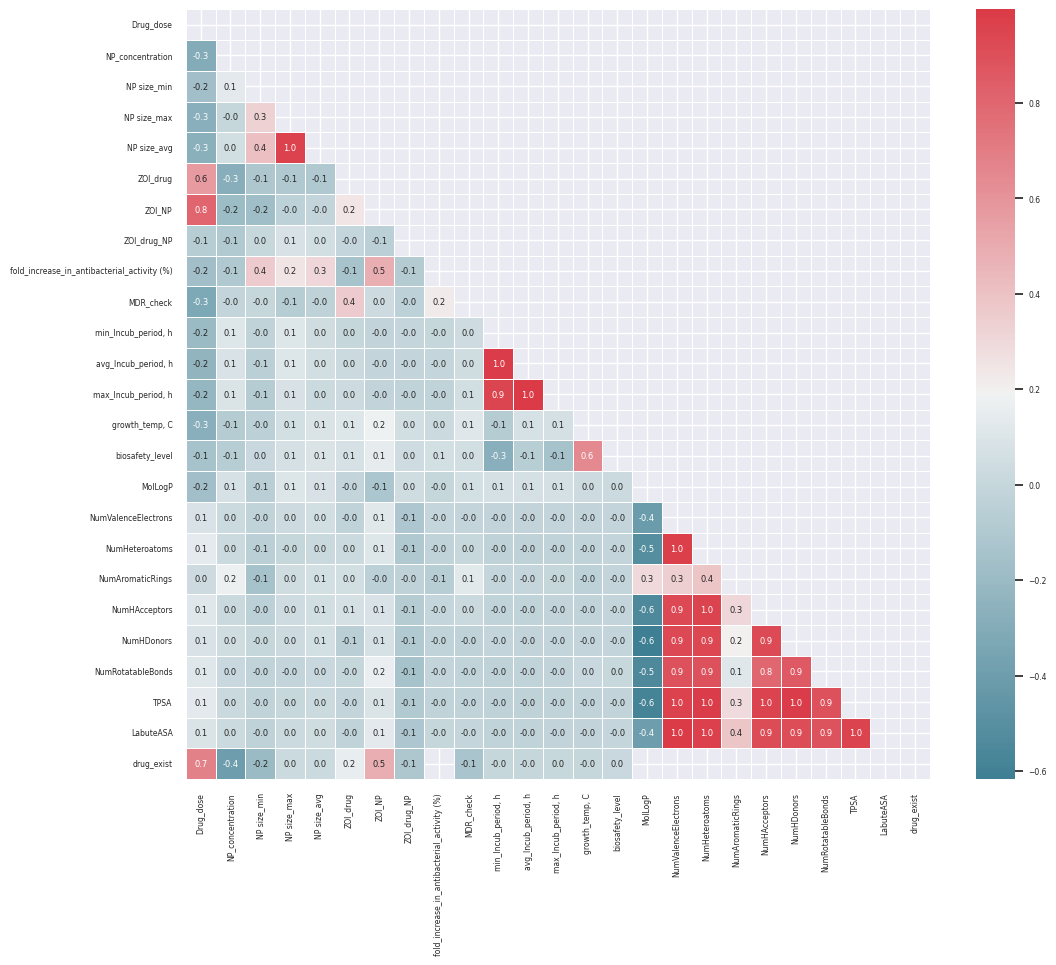

In [168]:
#Корреляционная карта
corr = db.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask,annot=True, fmt='.1f')

Закодируем Bacteria

In [169]:
#Зашифруем бактерии по genus
#коирование происходило по следующим признакам: форма, грам+-, каталаза и оксиадаза +-, способы питания и жизни
bacteria_dict = {
    'Acinetobacter': '1000010001',
    'Actinobacillus': '1010001111',
    'Bacillus': '1001110101',
    'Enterococcus': '1000100100',
    'Enterobacter': '0010000101',
    'Escherichia': '0010000101',
    'Haemophilus': '0010000110',
    'Klebsiella': '0010000100',
    'Listeria': '0010100101',
    'Micrococcus': '1010101011',
    'Neisseria': '0100010111',
    'Pasteurella': '0010000111',
    'Proteus': '0010010001',
    'Pseudomonas': '0011010011',
    'Salmonella': '0010000101',
    'Serratia': '0010000101',
    'Staphylococcus': '1000100101',
    'Streptococcus': '1000100111',
    'Vibrio': '0110000101'
}
def get_vactors_bact(bac):
    if bac.split(' ')[0] == 'Candida':
      # print('çandida')
      bact = [-1] * 10
    else:
      bact = list(map(float, list(bacteria_dict[bac.split(' ')[0]])))
    return pd.Series(bact)

bac_vect = pd.DataFrame(db['Bacteria'].apply(get_vactors_bact))
bac_vect.columns = [f'bac_{i}' for i in range(10)]

db = pd.concat([db, bac_vect], axis=1)

Переводим Smiles в векторы признаков

In [170]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem
import deepchem
from rdkit import Chem
deepchem.__version__
!git clone https://github.com/NVIDIA/apex
!cd /content/apex
!pip install -v --no-cache-dir /content/apex
!pip install transformers
!pip install simpletransformers
!pip install wandb
!cd ..
import sys
!test -d bertviz_repo && echo "FYI: bertviz_repo directory already exists, to pull latest version uncomment this line: !rm -r bertviz_repo"
# !rm -r bertviz_repo # Uncomment if you need a clean pull from repo
!test -d bertviz_repo || git clone https://github.com/jessevig/bertviz bertviz_repo
if not 'bertviz_repo' in sys.path:
  sys.path += ['bertviz_repo']
!pip install regex
!git clone https://github.com/seyonechithrananda/bert-loves-chemistry.git
!nvidia-smi
# Test if NVIDIA apex training tool works
clear_output()

Окружение установлено, теперь загрузим предобученную модель и попробуем посмотреть, что у нее получается на выходе. Возможно ее можем дообучить

In [171]:
from transformers import RobertaForCausalLM, RobertaTokenizer, pipeline, AutoConfig, RobertaConfig
# config = AutoConfig.from_pretrained("roberta-base")

tokenizer = RobertaTokenizer.from_pretrained("gokceuludogan/ChemBERTaLM")
model = RobertaForCausalLM.from_pretrained("gokceuludogan/ChemBERTaLM", output_hidden_states=True )
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)
generator("", max_length=128, do_sample=True)

[{'generated_text': 'NC(=O)Cc1csc(NC(=O)Cc2cccc3cccnc23)n1'}]

In [172]:
import torch
from tqdm import tqdm
def get_nlp_embadding(smile): # возможно неправильно и лучше брать просто брать последний вектор из скрытого слоя. Это можно будет отследить, когда будем улучшать качество моделей
  f = [0] * 768
  if smile and type(smile) != float:
    input = tokenizer.encode(smile, return_tensors="pt")
    token_logits = model(input)
    sentence_embedding = torch.mean(token_logits.hidden_states[6], 1)
    f  = sentence_embedding.squeeze().detach().numpy()
  return pd.Series(f)

In [175]:
tqdm.pandas()
smiles = pd.DataFrame(db.progress_apply(get_nlp_embadding))
smiles.columns = list(f'smiles_v_{i}' for i in range(768))
db = pd.concat([db, smiles], axis=1).drop(['smiles','Bacteria'], axis=1)

  2%|▏         | 1/56 [00:00<00:00, 253.59it/s]


ValueError: ignored

In [ ]:
#Разделим колонки на численные и категориальные
text_columns = db.select_dtypes(include='object').columns.tolist()
numeric_columns = db.select_dtypes(include=numerics).columns.tolist()

 ### Проверка

In [ ]:
#Убрать столбцы:

#drug
#shape (?)
#method
#MDR_check
#Bacteria (?)
#class (?)
#gram
#growth_temp, C
#biosafety_level
#isolated_from

# Убираем те, что слишком друг с другом коррелируют, неинформативные столбцы и, где много пропусков, чтобы избежать переобучения
db = db.drop(['NP_Synthesis', 'Drug_class_drug_bank', 'NP size_min', 'NP size_max', 'kingdom',
              'subkingdom','clade', 'phylum', 'order', 'family', 'min_Incub_period, h', 'max_Incub_period, h',
              'species', 'NumValenceElectrons', 'NumHeteroatoms', 'LabuteASA', 'NumRotatableBonds', 'NumHAcceptors',
              'NumHDonors', 'NumAromaticRings', 'chemID', 'prefered_name', 'fold_increase_in_antibacterial_activity (%)', 'Tax_id'], axis=1)

In [ ]:
#Корреляционная карта
corr = db.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask,annot=True, fmt='.1f')

In [ ]:
#поиск пустых ячеек
cols = db.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(db[cols].isnull(), cmap=sns.color_palette(colours))
sns.set (font_scale=0.5)
# процентный список пропущенных данных
for col in db.columns:
    pct_missing = np.mean(db[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))